<a href="https://colab.research.google.com/github/Deykoz/Machine-Learning-projects/blob/main/Multiple_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Find the best regression model**

The objective of this project is to predict the **Apnea-Hypopnea Index (IAH)** using key features such as **Age, BMI, and Cervical**.

We will evaluate the performance of several regression models, including linear and non-linear approaches, to determine which model provides the most accurate predictions.

Additionally, we will conduct hyperparameter optimization for each model to ensure that they are fine-tuned for maximum performance. The analysis will focus on comparing model performance using various evaluation metrics (R², MSE, RMSE, MAE) and identifying the most effective model for accurately predicting IAH based on the given features.







# **Linear regression model (Application of the OSA)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Read the Excel file
df = pd.read_excel('OSA_DB_UPM.xlsx')

# Create a new column with BMI obtained from Height and Weight
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

df.head()

,Patient,Gender,IAH,Weight,Age,Height,Cervical,BMI
0,P0002,hombre,29.6,119,56,174,48.0,39.305060
1,P0004,hombre,19.7,78,39,168,42.0,27.636054
2,P0005,hombre,9.0,80,32,173,40.0,26.729927
3,P0006,hombre,2.0,109,32,190,42.0,30.193906
4,P0007,hombre,34.0,86,39,169,42.0,30.110991


In order to do the regression, we need to drop the 'Patient' column and to encoder gender as 0 for male and 1 female.

In [ ]:
# Convert Gender into numerical
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Define features and target variable
X = df[['Gender', 'Age', 'BMI', 'Cervical']]
y = df['IAH']

# Display unique values and their frequency in 'Gender' column
print(df['Gender'].value_counts())

Gender
0    455
1    182
Name: count, dtype: int64


**Training of the model**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

**Performance metric of the model**

In [ ]:
# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate and print R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate and print Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate and print the Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 242.96289927078345
R-squared: 0.2566138146563083
Mean Absolute Error: 12.21388404888896
Root Mean Squared Error: 15.587267216250046


**Comments on the performance**

 A lower MSE indicates better predictive performance. The MSE value here is relatively high, suggesting that the model has considerable error in predicting the target variable

An R-squared value of 0.257 means that the modelis able to explain 25.7% of the variance in the target variable. Therefore the model has a relatively low ability to explain the variance in the data. Typically, higher R-squared values (closer to 1) indicate a better fit of the model.

The Mean Absolute Error (MAE) represents the average absolute difference between the predicted values and the actual values. Here, the MAE is 12.21, meaning that, on average, the model’s predictions are off by about 12.21 units of the target variable.

he higher the RMSE, the larger the discrepancies between the predicted and actual values, meaning the model has room for improvement. Given the RMSE value of 15.59, it suggests that the model’s predictions are not highly accurate

**Visualization of the results**

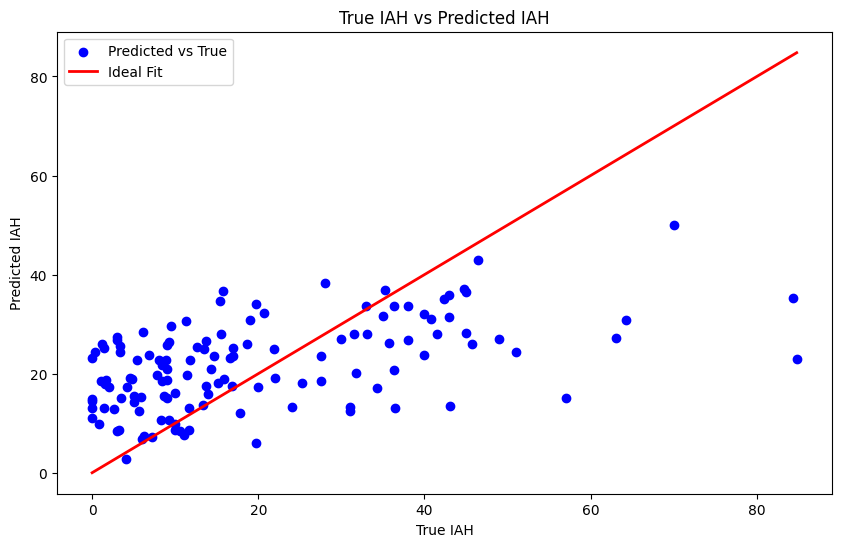

In [ ]:
import matplotlib.pyplot as plt

# Plot true IAH vs predicted IAH
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Fit')
plt.xlabel('True IAH')
plt.ylabel('Predicted IAH')
plt.title('True IAH vs Predicted IAH')
plt.legend()
plt.show()

To verify that our model is capturing some useful patterns and is performing better than a random guess. We will compare it with a naïve predictor

**Naïve predictor**

The naïve predictor, always predict the mean of the data

Naive Predictor Mean Squared Error: 327.2588229720749
Naive Predictor R-squared: -0.0013038565124330326
Naive Predictor Mean Absolute Error: 14.784436087917484
Naive Predictor Root Mean Squared Error: 18.09029637601537


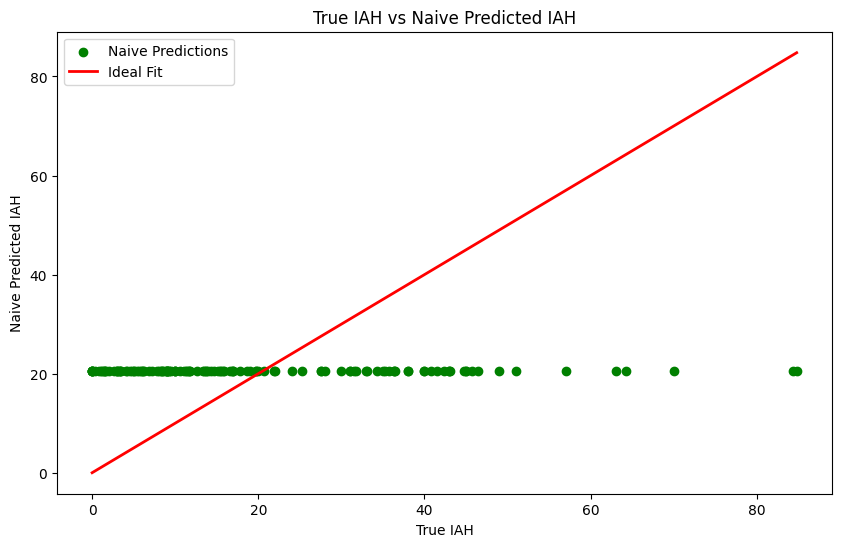

In [ ]:

# Calculate the mean of the target variable in the training set
naive_prediction = y_train.mean()

# Create an array of naive predictions for the test set
naive_predictions = np.full(len(y_test), naive_prediction)

# Calculate performance metrics for the naive predictor
mse_naive = mean_squared_error(y_test, naive_predictions)
r2_naive = r2_score(y_test, naive_predictions)
mae_naive = mean_absolute_error(y_test, naive_predictions)
rmse_naive = np.sqrt(mse_naive)

print(f'Naive Predictor Mean Squared Error: {mse_naive}')
print(f'Naive Predictor R-squared: {r2_naive}')
print(f'Naive Predictor Mean Absolute Error: {mae_naive}')
print(f'Naive Predictor Root Mean Squared Error: {rmse_naive}')

# Plot true IAH vs naive predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, naive_predictions, color='green', label='Naive Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Fit')
plt.xlabel('True IAH')
plt.ylabel('Naive Predicted IAH')
plt.title('True IAH vs Naive Predicted IAH')
plt.legend()
plt.show()

**Cross validation metrics**

To get more reliable metrics, we will use the cross validation.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Define features (X) and target variable (y)
X = df[['Gender', 'Age', 'BMI', 'Cervical']]
y = df['IAH']

# Define the number of folds for cross-validation
n_splits = 5  # You can adjust this value
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
r2_scores = []
mse_scores = []
rmse_scores = []
mae_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2_scores.append(r2_score(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))

# Calculate the average metrics across all folds
avg_r2 = np.mean(r2_scores)
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_mae = np.mean(mae_scores)

print(f'Average Mean Squared Error: {avg_mse}')
print(f'Average R-squared: {avg_r2}')
print(f'Average Root Mean Squared Error: {avg_rmse}')
print(f'Average Mean Absolute Error: {avg_mae}')

Average Mean Squared Error: 272.0454003897513
Average R-squared: 0.21308783070011503
Average Root Mean Squared Error: 16.47007140511483
Average Mean Absolute Error: 12.459672128941522


Summary

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Calculate and print the standard deviation for each metric
def print_metrics_with_std(y_true, y_pred, prefix=""):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f'{prefix}Mean Squared Error: {mse:.4f}')
    print(f'{prefix}R-squared: {r2:.4f}')
    print(f'{prefix}Mean Absolute Error: {mae:.4f}')
    print(f'{prefix}Root Mean Squared Error: {rmse:.4f}')

#initial model
print_metrics_with_std(y_test, y_pred, prefix="Initial Model ")

print("\n")

#Cross Validation
# Calculate the average metrics across all folds
avg_r2 = np.mean(r2_scores)
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_mae = np.mean(mae_scores)

std_r2 = np.std(r2_scores)
std_mse = np.std(mse_scores)
std_rmse = np.std(rmse_scores)
std_mae = np.std(mae_scores)

print(f'Average Mean Squared Error: {avg_mse:.4f} (std: {std_mse:.4f})')
print(f'Average R-squared: {avg_r2:.4f} (std: {std_r2:.4f})')
print(f'Average Root Mean Squared Error: {avg_rmse:.4f} (std: {std_rmse:.4f})')
print(f'Average Mean Absolute Error: {avg_mae:.4f} (std: {std_mae:.4f})')

print("\n")

#Naive predictor cross validation
# Calculate the average metrics across all folds for the naive predictor
avg_r2_naive = np.mean(r2_scores_naive)
avg_mse_naive = np.mean(mse_scores_naive)
avg_rmse_naive = np.mean(rmse_scores_naive)
avg_mae_naive = np.mean(mae_scores_naive)

std_r2_naive = np.std(r2_scores_naive)
std_mse_naive = np.std(mse_scores_naive)
std_rmse_naive = np.std(rmse_scores_naive)
std_mae_naive = np.std(mae_scores_naive)

print(f'Naive Predictor Average Mean Squared Error: {avg_mse_naive:.4f} (std: {std_mse_naive:.4f})')
print(f'Naive Predictor Average R-squared: {avg_r2_naive:.4f} (std: {std_r2_naive:.4f})')
print(f'Naive Predictor Average Root Mean Squared Error: {avg_rmse_naive:.4f} (std: {std_rmse_naive:.4f})')
print(f'Naive Predictor Average Mean Absolute Error: {avg_mae_naive:.4f} (std: {std_mae_naive:.4f})')

Initial Model Mean Squared Error: 308.5915
Initial Model R-squared: 0.1156
Initial Model Mean Absolute Error: 12.7770
Initial Model Root Mean Squared Error: 17.5668


Average Mean Squared Error: 272.0454 (std: 29.1042)
Average R-squared: 0.2131 (std: 0.0570)
Average Root Mean Squared Error: 16.4701 (std: 0.8844)
Average Mean Absolute Error: 12.4597 (std: 0.3703)


Naive Predictor Average Mean Squared Error: 345.3766 (std: 20.4125)
Naive Predictor Average R-squared: -0.0005 (std: 0.0006)
Naive Predictor Average Root Mean Squared Error: 18.5761 (std: 0.5512)
Naive Predictor Average Mean Absolute Error: 14.5100 (std: 0.4299)


In [ ]:
# Define features and target variable
X = df[['Gender', 'Age', 'BMI', 'Cervical']]
y = df['IAH']

# Define the number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mse, rmse, mae


for gender in [0, 1]:  # Iterate through genders
    print(f"\nResults for Gender = {gender}")

    # Filter data for the current gender
    X_gender = X[X['Gender'] == gender]
    y_gender = y[X['Gender'] == gender]

    if len(X_gender) < 2:  # handle cases where there are too few datapoints for a given gender
      print("Not enough data points for this gender")
      continue

    r2_scores = []
    mse_scores = []
    rmse_scores = []
    mae_scores = []

    for train_index, test_index in kf.split(X_gender):
        X_train, X_test = X_gender.iloc[train_index], X_gender.iloc[test_index]
        y_train, y_test = y_gender.iloc[train_index], y_gender.iloc[test_index]

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2, mse, rmse, mae = calculate_metrics(y_test, y_pred)

        r2_scores.append(r2)
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        mae_scores.append(mae)

    print(f"R2: {np.mean(r2_scores):.4f} ({np.std(r2_scores):.4f})")
    print(f"MSE: {np.mean(mse_scores):.4f} ({np.std(mse_scores):.4f})")
    print(f"RMSE: {np.mean(rmse_scores):.4f} ({np.std(rmse_scores):.4f})")
    print(f"MAE: {np.mean(mae_scores):.4f} ({np.std(mae_scores):.4f})")


Results for Gender = 0
R2: 0.2027 (0.0409)
MSE: 267.7641 (30.6405)
RMSE: 16.3344 (0.9753)
MAE: 12.8744 (0.7603)

Results for Gender = 1
R2: -0.0360 (0.1106)
MSE: 320.1022 (190.8111)
RMSE: 17.2707 (4.6717)
MAE: 11.8275 (1.8750)


**Coefficients of the model**

In [ ]:
# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Get the feature names
feature_names = X.columns

# Print the coefficients with corresponding feature names
print("Coefficients:")
for coef, feature in zip(coefficients, feature_names):
    print(f"{feature}: {coef}")

print(f"\nIntercept: {intercept}")

Coefficients:
Gender: 0.0
Age: 0.21565890267092402
BMI: 0.5474193039448972
Cervical: 1.547412983236107

Intercept: -68.74953891246476


**Function for display the performance metrics**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def print_metrics_with_std(y_true, y_pred, prefix=""):
    # Calcul des résidus (erreurs de prédiction)
    residuals = y_true - y_pred

    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    # Calcul de l'écart type des résidus

    std_mae = np.std(np.abs(residuals))  # Écart type des résidus absolus pour MAE
    std_rmse = np.std(np.sqrt(np.abs(residuals)))  # Écart type des racines carrées des résidus pour RMSE

    print(f'{prefix}Mean Squared Error: {mse:.4f}')
    print(f'{prefix}R-squared: {r2:.4f}')
    print(f'{prefix}Mean Absolute Error: {mae:.4f} (Std: {std_mae:.4f})')
    print(f'{prefix}Root Mean Squared Error: {rmse:.4f} (Std: {std_rmse:.4f})')

# **Linear Regression model**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

columns_to_normalize = ['Age', 'BMI', 'Cervical']

# Créer un objet StandardScaler
scaler = StandardScaler()

# Appliquer la normalisation sur les colonnes sélectionnées
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Vérifier les résultats

# Define features and target variable
X = df[['Age', 'BMI', 'Cervical']]
y = df['IAH']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Linear Regression (even though it doesn't have hyperparameters to tune directly)
param_grid = {} # Empty dictionary for Linear Regression

# Create a Linear Regression model
model = LinearRegression()

# Perform GridSearchCV (It will still do cross-validation even without hyperparameters to tune)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters (it will simply show the default parameters as there are none to tune)
print("Best hyperparameters:", grid_search.best_params_)


# Train the final model using the best hyperparameters (which are the default in this case)
best_model = LinearRegression(**grid_search.best_params_)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = best_model.predict(X_test)

# Evaluate the model
print_metrics_with_std(y_test, y_pred_linear, prefix="Linear Regression with best params ")

Best hyperparameters: {}
Linear Regression with best params Mean Squared Error: 243.0135
Linear Regression with best params R-squared: 0.2565
Linear Regression with best params Mean Absolute Error: 12.2154 (Std: 9.6849)
Linear Regression with best params Root Mean Squared Error: 15.5889 (Std: 1.3568)


**Comments :**

R² of 0.256 indicates that the model explains only 25.6% of the variance in the target variable (IAH). This suggests that the linear regression model is not very effective at predicting IAH with the given features.
The MSE, RMSE, and MAE values are relatively high, which indicates significant errors in predictions, suggesting the model struggles to make accurate predictions.

# **Ridge regression**

In [ ]:
#Train and test a Ridge regression model to predict the IAH with those features, predictors: Age, BMI, Cervical

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


columns_to_normalize = ['Age', 'BMI', 'Cervical']

# Créer un objet StandardScaler
scaler = StandardScaler()

# Appliquer la normalisation sur les colonnes sélectionnées
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Define features and target variable

X = df[['Age', 'BMI', 'Cervical']]
y = df['IAH']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Ridge regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 200]}

# Create a Ridge regression model
ridge = Ridge()

# Perform GridSearchCV to find the best alpha value
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train a Ridge regression model with the best alpha
best_ridge_model = Ridge(alpha=grid_search.best_params_['alpha'])
best_ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = best_ridge_model.predict(X_test)

# Evaluate the Ridge regression model
print_metrics_with_std(y_test, y_pred_ridge, prefix="Ridge Regression ")

Best hyperparameters: {'alpha': 10}
Ridge Regression Mean Squared Error: 243.0733
Ridge Regression R-squared: 0.2563
Ridge Regression Mean Absolute Error: 12.2282 (Std: 9.6719)
Ridge Regression Root Mean Squared Error: 15.5908 (Std: 1.3521)


**Comments :**

The performance of Ridge Regression is almost identical to Linear Regression. The R² is slightly lower at 0.256, which is a negligible difference, indicating that the addition of L2 regularization does not provide a significant improvement for this dataset.
The error metrics (MSE, RMSE, MAE) are nearly identical to those of Linear Regression, confirming that regularization does not significantly affect the model's performance in this case.

# **Lasso Regression Model**

In [ ]:
#Train and test a Lasso regression model to predict the IAH with those features, predictors: Age, BMI, Cervical

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['Age', 'BMI', 'Cervical']

# Créer un objet StandardScaler
scaler = StandardScaler()

# Appliquer la normalisation sur les colonnes sélectionnées
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Define features and target variable
X = df[['Age', 'BMI', 'Cervical']]
y = df['IAH']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Lasso regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a Lasso regression model
lasso = Lasso()

# Perform GridSearchCV to find the best alpha value
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train a Lasso regression model with the best alpha
best_lasso_model = Lasso(alpha=grid_search.best_params_['alpha'])
best_lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = best_lasso_model.predict(X_test)

# Evaluate the Lasso regression model
print_metrics_with_std(y_test, y_pred_lasso, prefix="Lasso Regression ")

Best hyperparameters: {'alpha': 0.1}
Lasso Regression Mean Squared Error: 243.3500
Lasso Regression R-squared: 0.2554
Lasso Regression Mean Absolute Error: 12.2363 (Std: 9.6759)
Lasso Regression Root Mean Squared Error: 15.5997 (Std: 1.3488)


**Comments :**

Similar to Linear Regression and Ridge Regression, Lasso Regression also performs quite similarly with an R² of 0.255. The difference in performance is minimal, which suggests that the L1 regularization does not provide a significant benefit for this particular dataset.
The error metrics (MSE, RMSE, MAE) are also almost identical, indicating that Lasso doesn't improve predictions in this context either.

# **Elastic Net Regression**

In [ ]:
#Train and test a Elastic Net Regression model to predict the IAH with those features, predictors: Age, BMI, Cervical

from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['Age', 'BMI', 'Cervical']

# Créer un objet StandardScaler
scaler = StandardScaler()

# Appliquer la normalisation sur les colonnes sélectionnées
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Define features and target variable
X = df[['Age', 'BMI', 'Cervical']]
y = df['IAH']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Elastic Net regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

# Create an Elastic Net regression model
elastic_net = ElasticNet()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train an Elastic Net regression model with the best hyperparameters
best_elastic_net_model = ElasticNet(alpha=grid_search.best_params_['alpha'], l1_ratio=grid_search.best_params_['l1_ratio'])
best_elastic_net_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_elastic_net = best_elastic_net_model.predict(X_test)

# Evaluate the Elastic Net regression model
print_metrics_with_std(y_test, y_pred_elastic_net, prefix="Elastic Net Regression ")

Best hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.3}
Elastic Net Regression Mean Squared Error: 243.4796
Elastic Net Regression R-squared: 0.2550
Elastic Net Regression Mean Absolute Error: 12.2697 (Std: 9.6402)
Elastic Net Regression Root Mean Squared Error: 15.6038 (Std: 1.3434)


**Comments**

Elastic Net Regression (which combines L1 and L2 regularization) also shows performance nearly identical to that of Lasso and Ridge. The R² of 0.255 is slightly lower than the other models, suggesting that this model may not capture the underlying patterns in the data better than the others.
As with the other regularized models, the error metrics are close to those of Linear Regression, suggesting that regularization does not significantly affect the model’s ability to predict IAH in this case.

# **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['Age', 'BMI', 'Cervical']

# Créer un objet StandardScaler
scaler = StandardScaler()

# Appliquer la normalisation sur les colonnes sélectionnées
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Define features and target variable
X = df[['Age', 'BMI', 'Cervical']]
y = df['IAH']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Polynomial Regression
param_grid = {'poly__degree': [2, 3, 4]} # You can adjust the degree range

# Create a Polynomial Regression model
poly_reg = PolynomialFeatures()
linear_model = LinearRegression()

# Create a pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('poly', poly_reg),
    ('linear', linear_model)
])

# Perform GridSearchCV to find the best degree
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train a Polynomial Regression model with the best degree
best_poly_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_poly = best_poly_model.predict(X_test)

# Evaluate the polynomial regression model
print_metrics_with_std(y_test, y_pred_poly, prefix="Polynomial Regression with Best Degree ")

Best hyperparameters: {'poly__degree': 2}
Polynomial Regression with Best Degree Mean Squared Error: 238.3468
Polynomial Regression with Best Degree R-squared: 0.2707
Polynomial Regression with Best Degree Mean Absolute Error: 12.0686 (Std: 9.6279)
Polynomial Regression with Best Degree Root Mean Squared Error: 15.4385 (Std: 1.3064)


**Comments:**

Polynomial Regression outperforms all the other models with a R² of 0.271, which means it explains around 27.1% of the variance in the target variable. While still not a very high R², it shows a slight improvement compared to the linear models.
The MSE, RMSE, and MAE are also slightly better than those of the other models, indicating that the Polynomial Regression model is able to capture some non-linear patterns in the data, leading to better predictions.

# **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['Age', 'BMI', 'Cervical']

# Créer un objet StandardScaler
scaler = StandardScaler()

# Appliquer la normalisation sur les colonnes sélectionnées
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
# Define features and target variable
X = df[['Age', 'BMI', 'Cervical']]
y = df['IAH']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest Regression
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],     # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
}

# Create a Random Forest Regression model
rf_regressor = RandomForestRegressor(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train a Random Forest Regression model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest Regression model
print_metrics_with_std(y_test, y_pred_rf, prefix="Random Forest Regression ")

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Regression Mean Squared Error: 268.2684
Random Forest Regression R-squared: 0.1792
Random Forest Regression Mean Absolute Error: 12.5184 (Std: 10.5621)
Random Forest Regression Root Mean Squared Error: 16.3789 (Std: 1.3948)


**Comments:**

Random Forest Regression performs the worst among all the models with an R² of 0.179, meaning it explains only 17.9% of the variance in the IAH. This is quite low compared to the other models, especially since Random Forest is generally considered a powerful model for capturing complex relationships.
The MSE, RMSE, and MAE are the highest among all the models, suggesting that the Random Forest model is overfitting or not well-tuned for this particular dataset. This could be due to excessive complexity or a poor choice of hyperparameters.

# **Final results**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mse, rmse, mae

# Assuming you have your models and predictions stored as follows:
# Replace these with your actual models and predictions (from your provided code)

models = {
    "Linear Regression": (y_test, y_pred_linear),
    "Ridge Regression": (y_test, y_pred_ridge),
    "Lasso Regression": (y_test, y_pred_lasso),
    "Elastic Net Regression": (y_test, y_pred_elastic_net),
    "Polynomial Regression": (y_test, y_pred_poly),
    "Random Forest Regression": (y_test, y_pred_rf)
}


metrics_data = []
for model_name, (y_true, y_pred) in models.items():
    r2, mse, rmse, mae = calculate_metrics(y_true, y_pred)

    # Calculate standard deviations for each metric
    residuals = y_true - y_pred
    std_mae = np.std(np.abs(residuals))  # Écart type des résidus absolus pour MAE
    std_rmse = np.std(np.sqrt(np.abs(residuals)))  # Écart type des racines carrées des résidus pour RMSE


    metrics_data.append([model_name, r2, mse, rmse, std_rmse, mae, std_mae])


metrics_df = pd.DataFrame(metrics_data, columns=["Model", "R2", "MSE","RMSE", "std_RMSE", "MAE", "std_MAE"])
metrics_df

,Model,R2,MSE,RMSE,std_RMSE,MAE,std_MAE
0,Linear Regression,0.256459,243.013451,15.588889,1.356809,12.215381,9.684933
1,Ridge Regression,0.256276,243.073327,15.590809,1.352138,12.228165,9.671882
2,Lasso Regression,0.255429,243.350012,15.599680,1.348775,12.236281,9.675920
3,Elastic Net Regression,0.255033,243.479571,15.603832,1.343433,12.269703,9.640226
4,Polynomial Regression,0.270738,238.346756,15.438483,1.306413,12.068597,9.627862
5,Random Forest Regression,0.179187,268.268353,16.378900,1.394812,12.518402,10.562100


The Best Model is the Polynomial Regression model performs the best, with a R² of 0.271, showing it captures some non-linear relationships between the features and IAH more effectively than the linear models. It also produces slightly better error metrics (MSE, RMSE, and MAE).

Linear Models: Linear Regression, Ridge, Lasso, and Elastic Net have very similar performance. They all have low R² values (around 0.25), indicating that these models are not well-suited to predicting IAH with the given features. Regularization did not significantly improve the performance of the models.

The Random Forest Regression model, despite being a more complex model, performs poorly with a very low R² and high errors. This could indicate overfitting, underfitting, or suboptimal hyperparameter choices. It would be worth investigating its hyperparameters and considering other ensemble methods or tuning strategies.